In [1]:
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp, quad
import matplotlib.pyplot as plt

In [67]:
!g++ -o main main.cpp Integrator.cpp RCS.cpp -I ./ && ./main
df = pd.read_csv('data.csv')
df = df.set_index(keys='time', drop=True)

In [68]:
J1, J2, J3 = 4223, 4133, 768
M1, M2, M3 = 0, 0, 10
w1, w2, w3 = 0.0001, 0, 0

def cos_fresnel(theta):
    return np.cos(theta) / np.sqrt(theta)
def sin_fresnel(theta):
    return np.sin(theta) / np.sqrt(theta)

def theta_1_func(t):
    theta_star = M3 * t ** 2 / (2*J1)
    term1 = w1 * np.sqrt(J1 / (2*M3)) * quad(cos_fresnel, 0, theta_star)[0]
    term2 = w2 * np.sqrt(J1 / (2*M3)) * quad(sin_fresnel, 0, theta_star)[0]
    return term1 - term2

def theta_2_func(t):
    theta_star = M3 * t ** 2 / (2*J1)
    term1 = w1 * np.sqrt(J1 / (2*M3)) * quad(sin_fresnel, 0, theta_star)[0]
    term2 = w2 * np.sqrt(J1 / (2*M3)) * quad(cos_fresnel, 0, theta_star)[0]
    return term1 + term2
    
t = np.linspace(0, 100, 500)
theta_1 = np.array([theta_1_func(curr_t) for curr_t in t])
theta_2 = np.array([theta_2_func(curr_t) for curr_t in t])



<ipython-input-68-c4d5711d3f00>:6: RuntimeWarning: divide by zero encountered in double_scalars
  return np.cos(theta) / np.sqrt(theta)
<ipython-input-68-c4d5711d3f00>:12: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  term1 = w1 * np.sqrt(J1 / (2*M3)) * quad(cos_fresnel, 0, theta_star)[0]
<ipython-input-68-c4d5711d3f00>:8: RuntimeWarning: invalid value encountered in double_scalars
  return np.sin(theta) / np.sqrt(theta)
<ipython-input-68-c4d5711d3f00>:13: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  term2 = w2 * np.sqrt(J1 / (2*M3)) * quad(sin_fresnel, 0, theta_star)[0]
<ipython-input-68-c4d5711d3f00>:18: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  term1 = w1 * np.sqrt(J1 / (2*M3)) * quad(sin_fresnel, 0, theta_star)[0]
<ipython-input-68-c4d5711d3f00>:19: IntegrationWarning: Extremely bad integrand b

<AxesSubplot:xlabel='theta_1'>

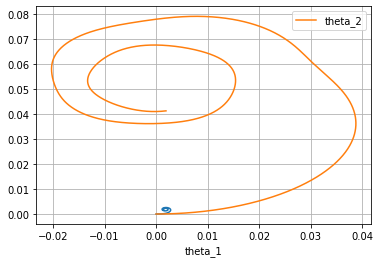

In [69]:
fig, ax = plt.subplots()
ax.plot(theta_1, theta_2)
df.plot(x='theta_1', y='theta_2', grid=True, ax=ax)

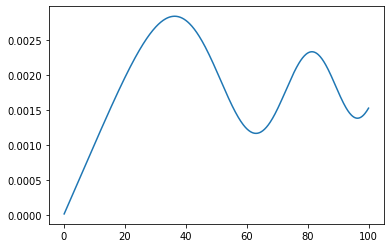

In [70]:
plt.plot(t, theta_1)

<AxesSubplot:xlabel='time'>

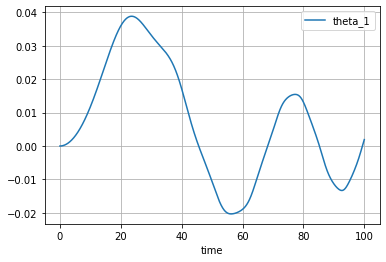

In [71]:
df.plot(y='theta_1', grid=True)

<AxesSubplot:xlabel='time'>

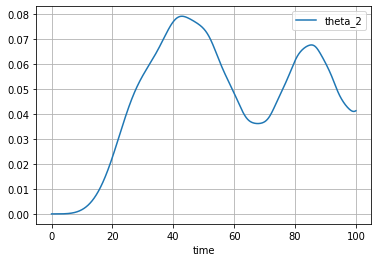

In [72]:
df.plot(y='theta_2', grid=True)

<AxesSubplot:xlabel='time'>

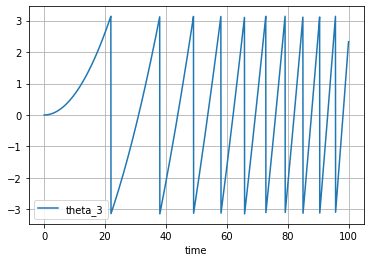

In [73]:
df.plot(y='theta_3', grid=True)

<AxesSubplot:xlabel='time'>

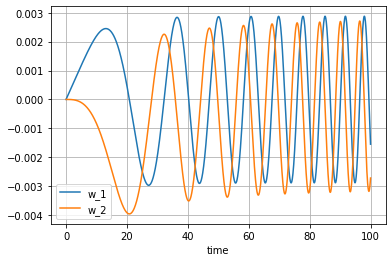

In [74]:
df[['w_1', 'w_2']].plot(grid=True)

<AxesSubplot:xlabel='time'>

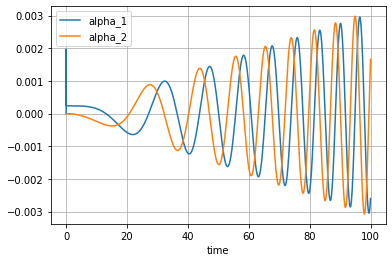

In [75]:
df[['alpha_1', 'alpha_2']].plot(grid=True)